# Calculating the para-amplification of the signal in our Toy model

In the paper we do not account the decay of each electric fields as 1/r^2 from its source.


Here we consider this phenomena and show that the phase matching condition ($\Delta k = 0$) corresponds to the best amplification, as found counsidering the fields amplitude uniform in space.


In addition this computer assisted result shows how the amplification changes if the phase matching condition is just "quasi-satisfied" ($\Delta k\simeq 0$ but not necessarly 0).

### Primary and secondary electrical fields
We deal with a second order process, so there are
- Primary fields: the one generated by the interaction of external fields with the sites of the lattice:
$$E_n(x,t)\sim \frac{1}{(x-x_n)^2}e^{i(k(x-x_n)-\omega t)}$$
this is the shape of the field generated by the n-th lattice site due to the interaction with an external source of frequency $\omega$.
- Secondary fields: generated by the interaction of the primary fields with the lattice sites (see the paper for more info)
$$E_m(x,t) \sim \frac{1}{(x_n-x_m)^2}\frac{1,(x_n-x)^2}e^{i(k(x-x_m)-\omega t)}$$
this is the shape of a second order field.

By summing the contributions of all the secondary fields to the field in position $x$, considering only the fields with the _signal frequency_ (see the paper to understand), we find the value of the wave with _signal frequency_ at point $x$ to be:
$$e^{i(k_sx-\omega_st)}\sum_{n\neq m}\frac{1}{(x-x_n)^2(x_n-x_m)^2}e^{i\Delta k(x_m-x_n)}$$
where $\omega_s$ is the _signal frequency_ and $k_s$ is the wave vector corresponding to that frequency (it depends on the dispersion relation of the crystal, that is _nonlinear_).


Considering just the amplitude (not the oscillating part) and writing $x_n = na$, where we set the lattice spacing $a=1$ (so $L=N$, where $N$ is the number of sites in the lattice) we get
$$\sum_{n\neq m}\frac{1}{(x-n)^2(n-m)^2}e^{i\Delta k(m-n)}$$
and considering a point $x$ far from the lattice $x>>L=N$, we can approximate the above relation to
$$\frac{1}{x}\sum_{n\neq m}\frac{1}{(n-m)^2}e^{i\Delta k(m-n)}$$

Now we calculate this sum with a simple algorithm (without the 1/x term)

In [39]:
import numpy as np
N = 10             # Lattice points (L=N because we set a=1)
dk_step = 0.0001   # \Delta k step lenght (we sample the amplification for many values of \Delta k with this spacing)
kmax = np.pi           # Max of the (absolute value of) \Delta k
ys = np.zeros(int(2*kmax/dk_step))          # Y axis (amplification value for many \Delta k)
dks = np.linspace(-5,5,int(2*kmax/dk_step)) # X axis (sampled \Delta k values)
for i in np.arange(0,len(dks)):
    sum = 0
    for n in np.arange(0,N):
        for m in np.arange(0,N):
            if n != m:
                sum = sum + np.cos(dks[i]*(m-n))/abs(m-n)**3
    ys[i] = sum/N

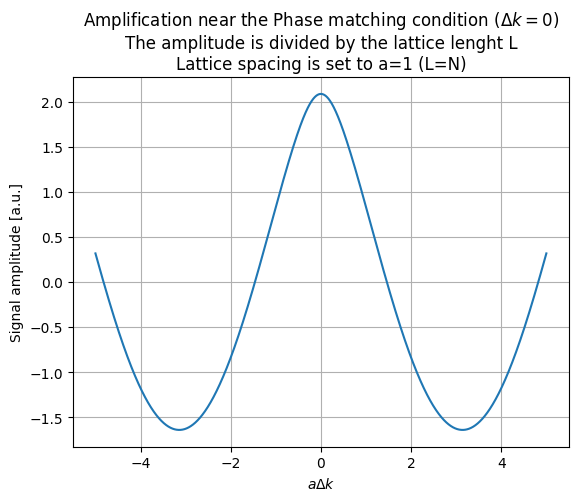

In [42]:
"""PLOT RESULTS"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(dks, ys)
ax.set_xlabel('$\Delta k*a$')
ax.set_ylabel('Signal amplitude [a.u.]')
ax.set_title('Amplification near the Phase matching condition ($\Delta k = 0$)\nThe amplitude is divided by the lattice lenght L\nLattice spacing is set to a=1 (L=N)')
ax.grid(True)

plt.show()